This notebook was built on images mined directly from DuckGo

The whole notebook uses Fastai Computer vision library so this is a definite requirements. so run


```
pip install fastai
or for notebooks
!pip install fastai
```



In [1]:
from fastcore.all import *
from fastai.vision.all import *
import time

ModuleNotFoundError: No module named 'fastcore'

In [ ]:
path = '../Data'

This loads the image to be trained by the model

In [2]:
house = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms= [Resize([300,400], method='squish')]
)

NameError: name 'DataBlock' is not defined

In [29]:
dls = house.dataloaders(path)

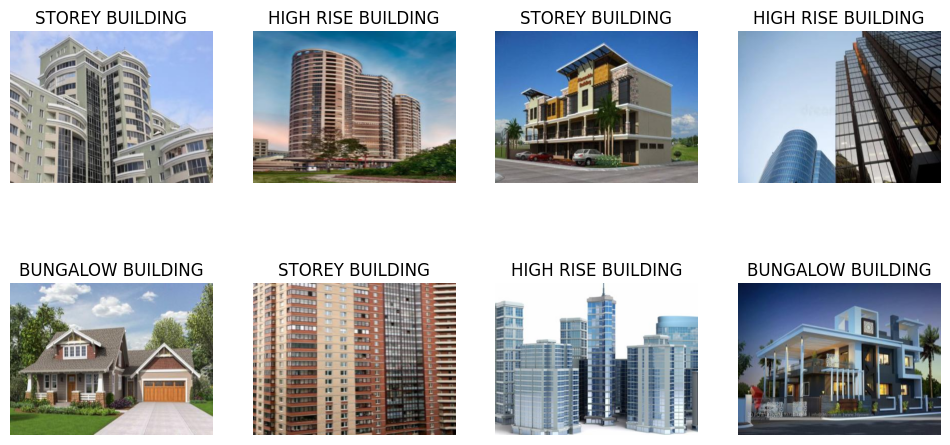

In [30]:
dls.valid.show_batch(max_n=8)

Im using resnet18 because thats the fastest. other models available [here](https://fastai1.fast.ai/vision.models.html#Computer-Vision-models-zoo)

In [31]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.791758,0.621636,0.286957,05:37


epoch,train_loss,valid_loss,error_rate,time
0,0.601956,0.511251,0.182609,07:39
1,0.449983,0.436933,0.147826,07:16
2,0.315098,0.396790,0.130435,07:17


This cell is meant to test the model with a random building image. It also gives us an idea on how to call predictions on the model

In [32]:
is_diag,_,probs= learn.predict(Image.open('bungalow.jpg').to_thumb(256,256))
print(f'This is a {is_diag}')
print(f'probability it is a diagram = {probs[0]:.4f}')

This is a BUNGALOW BUILDING
probability it is a diagram = 0.9403


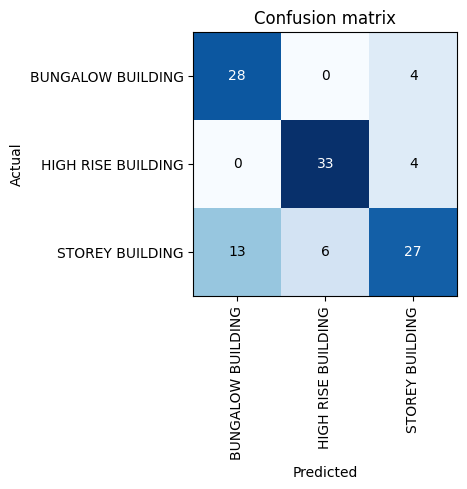

In [18]:
metrixs = ClassificationInterpretation.from_learner(learn)
metrixs.plot_confusion_matrix()

In [19]:
metrixs.print_classification_report()

                    precision    recall  f1-score   support

 BUNGALOW BUILDING       0.68      0.88      0.77        32
HIGH RISE BUILDING       0.85      0.89      0.87        37
   STOREY BUILDING       0.77      0.59      0.67        46

          accuracy                           0.77       115
         macro avg       0.77      0.78      0.77       115
      weighted avg       0.77      0.77      0.76       115



In [22]:
from fastai.vision.widgets import ImageClassifierCleaner

The ImageClassifierCleaner helps clean your dataset so as to make the model do better
calling the cleaner after inicializing it allows you to manually tweak the image positions.

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

After running this, you can go ahead and initialize the Datablocks again before training the model again.

In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

This cell was ran after the model has been retrained.

The result is not 100% but its noticably better than before

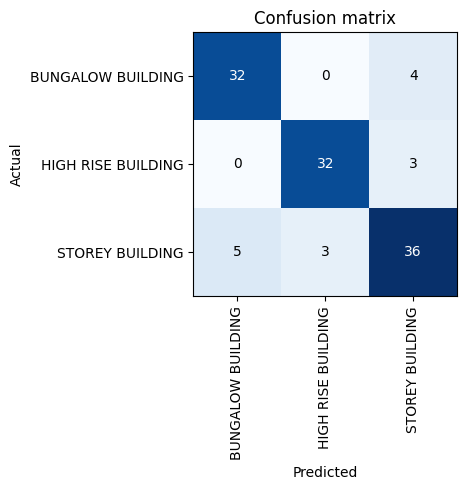

In [33]:
metrixs = ClassificationInterpretation.from_learner(learn)
metrixs.plot_confusion_matrix()

you can also run metrixs.plot_top_losses() to see which images are truly giving the model issues